## Determine the signficance of Eruptions

Volcanic eruption is a natural disaster that causes rupture in the crust of a planetary-mass object.  Planetary object such as Earth, allows hot lava, volcanic ash, and gases to escape from a magma chamber in the subsurface to the surface through a rigorous process that involves opening up of layers of the earth to allow for passage of the crustal materials. The violet nature of the process leads to ground movement which is known today as earthquake. 

Wikipedia defines Earthquake (also known as a quake, tremor or temblor) as the shaking of the surface of the Earth, resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves”. In effect, the amount of shaking felt on the surface depends on the amount of energy released by the process. Scientists involved in the study of earthquakes, have devised means to understand this energy, by studying and classifying the human impact of the effect of the disaster. 

According to NOAA the following factors or impact rating can be used in classifying an eruption as either significant  or non-significant.  “A significant eruption is classified as one that meets at least one of the following criteria: caused fatalities, caused moderate damage (approximately $1 million or more), with a Volcanic Explosivity Index (VEI) of 6 or larger, caused a tsunami, or was associated with a major earthquake.” 

This work seeks to classify eruption as either Significant or non-Significant using NOAA's criteria. Data set from Tableau public we be used for this task. 
link provided: https://public.tableau.com/en-us/s/resources  

In [1]:
# import necessary libaries 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns 
import pandas as pd 
%matplotlib inline
from pandas import DataFrame as df
from mpl_toolkits.basemap import Basemap
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import statistics 
from sklearn.cluster import KMeans
import folium 
from folium.plugins import MarkerCluster


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ayokunnumi\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#import data 
data  = pd.read_excel('significantvolcanoeruptions_Project.xlsx')
data

SN  Year  Month   Day Associated Tsunami? Associated Earthquake?  \
0        1 -4360    NaN   NaN                 NaN                    NaN   
1        2 -4350    NaN   NaN                 NaN                    NaN   
2        3 -4050    NaN   NaN                 NaN                    NaN   
3        4 -4000    NaN   NaN                 NaN                    NaN   
4        5 -3580    NaN   NaN                 NaN                    NaN   
...    ...   ...    ...   ...                 ...                    ...   
2867  2868  1832   11.0   1.0                 NaN                    NaN   
2868  2869  1832   12.0  25.0                 NaN                    NaN   
2869  2870  1833   11.0  24.0                 NaN                    NaN   
2870  2871  1835    1.0  20.0                 NaN                    NaN   
2871  2872  1835   11.0   1.0                 NaN                    NaN   

                 Name            Location           Country  Latitude  ...  \
0     Macauley Island         Kermadec Is       New Zealand   -30.200  ...   
1               Kikai           Ryukyu Is             Japan    30.780  ...   
2              Masaya           Nicaragua         Nicaragua    11.984  ...   
3                Pago  New Britain-SW Pac  Papua New Guinea    -5.580  ...   
4                Taal   Luzon-Philippines       Philippines    14.002  ...   
...               ...                 ...               ...       ...  ...   
2867             Etna               Italy             Italy    37.734  ...   
2868           Merapi                Java         Indonesia    -7.542  ...   
2869             Kaba             Sumatra         Indonesia    -3.520  ...   
2870        Cosiguina           Nicaragua         Nicaragua    12.980  ...   
2871        Banda Api           Banda Sea     Pacific Ocean    -4.525  ...   

      TOTAL_DEATHS_DESCRIPTION  TOTAL_MISSING TOTAL_MISSING_DESCRIPTION  \
0                          NaN            NaN                       NaN   
1                          3.0            NaN                       NaN   
2                          NaN            NaN                       NaN   
3                          NaN            NaN                       NaN   
4                          NaN            NaN                       NaN   
...                        ...            ...                       ...   
2867                       2.0            NaN                       NaN   
2868                       1.0            NaN                       NaN   
2869                       3.0            NaN                       NaN   
2870                       1.0            NaN                       NaN   
2871                       3.0            NaN                       NaN   

     TOTAL_INJURIES TOTAL_INJURIES_DESCRIPTION  TOTAL_DAMAGE_MILLIONS_DOLLARS  \
0               NaN                        NaN                            NaN   
1               NaN                        NaN                            NaN   
2               NaN                        NaN                            NaN   
3               NaN                        NaN                            NaN   
4               NaN                        NaN                            NaN   
...             ...                        ...                            ...   
2867            NaN                        NaN                            NaN   
2868            NaN                        NaN                            NaN   
2869            NaN                        NaN                            NaN   
2870            NaN                        NaN                            NaN   
2871            NaN                        NaN                            NaN   

     TOTAL_DAMAGE_DESCRIPTION  TOTAL_HOUSES_DESTROYED  \
0                         NaN                     NaN   
1                         3.0                     NaN   
2                         NaN                     NaN   
3                         NaN                     NaN   

In [3]:
#data information
print('Note the number of null values in the data\n')
data.info()

Note the number of null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SN                                  2872 non-null   int64  
 1   Year                                2872 non-null   int64  
 2   Month                               2355 non-null   float64
 3   Day                                 2126 non-null   float64
 4   Associated Tsunami?                 572 non-null    object 
 5   Associated Earthquake?              241 non-null    object 
 6   Name                                2872 non-null   object 
 7   Location                            2872 non-null   object 
 8   Country                             2872 non-null   object 
 9   Latitude                            2872 non-null   float64
 10  Longitude                           2872 non-null   float64
 11 

Historical data from 4360BC complied by NOAA is used for this classification, that accounts for the high noise level in the data set, most data points are missing, majorly because, for some of the eruptions epicentres, not all indicators can be measured (e.g. an eruption in the middle-Atlantic ocean cannot cause damage to properties except if it combines with other multiple effects to wreak havoc, which is beyond the scope of this study) and the fact that some of the eruptions had long happened when science was still in it infant. This project will work with the available data set by thoroughly cleaning up and getting rid of noise to make the best use of the avaliable data. 

#### Data Preparation 

In [4]:
#drop columns that will are too noisy or that is not needed for the classification and analysis 
ndata = data.drop(['Agent','DEATHS','DEATHS_DESCRIPTION','MISSING','MISSING_DESCRIPTION','INJURIES','INJURIES_DESCRIPTION',
                 'DAMAGE_MILLIONS_DOLLARS','DAMAGE_DESCRIPTION','HOUSES_DESTROYED','HOUSES_DESTROYED_DESCRIPTION',
                 'TOTAL_DEATHS','TOTAL_MISSING','TOTAL_INJURIES_DESCRIPTION','TOTAL_DAMAGE_MILLIONS_DOLLARS',
                  'TOTAL_HOUSES_DESTROYED','TOTAL_HOUSES_DESTROYED_DESCRIPTION','TOTAL_MISSING_DESCRIPTION',
                 'TOTAL_INJURIES'], axis=1)
ndata.head()

SN  Year  Month  Day Associated Tsunami? Associated Earthquake?  \
0   1 -4360    NaN  NaN                 NaN                    NaN   
1   2 -4350    NaN  NaN                 NaN                    NaN   
2   3 -4050    NaN  NaN                 NaN                    NaN   
3   4 -4000    NaN  NaN                 NaN                    NaN   
4   5 -3580    NaN  NaN                 NaN                    NaN   

              Name            Location           Country  Latitude  Longitude  \
0  Macauley Island         Kermadec Is       New Zealand   -30.200   -178.470   
1            Kikai           Ryukyu Is             Japan    30.780    130.280   
2           Masaya           Nicaragua         Nicaragua    11.984    -86.161   
3             Pago  New Britain-SW Pac  Papua New Guinea    -5.580    150.520   
4             Taal   Luzon-Philippines       Philippines    14.002    120.993   

   Elevation           Type      Status Time  Volcano Explosivity Index (VEI)  \
0        238        Caldera    Holocene    U                              6.0   
1        717        Caldera  Historical   D1                              7.0   
2        635        Caldera  Historical   D1                              6.0   
3        742        Caldera  Historical   D2                              6.0   
4        400  Stratovolcano  Historical   D1                              6.0   

   TOTAL_DEATHS_DESCRIPTION  TOTAL_DAMAGE_DESCRIPTION  Classification   
0                       NaN                       NaN              NaN  
1                       3.0                       3.0              1.0  
2                       NaN                       NaN              NaN  
3                       NaN                       NaN              NaN  
4                       NaN                       NaN              NaN

In [5]:
#Use dummies library to select data.
df = pd.get_dummies(ndata['TOTAL_DEATHS_DESCRIPTION'], prefix='dum')
df['D_class'] = df['dum_1.0'].add(df['dum_2.0']).add(df['dum_3.0']).add(df['dum_4.0'])
df = df['D_class']

#concatinate dummy data with data
df = pd.concat([ndata,df],  axis=1, sort=False)
df.head()

SN  Year  Month  Day Associated Tsunami? Associated Earthquake?  \
0   1 -4360    NaN  NaN                 NaN                    NaN   
1   2 -4350    NaN  NaN                 NaN                    NaN   
2   3 -4050    NaN  NaN                 NaN                    NaN   
3   4 -4000    NaN  NaN                 NaN                    NaN   
4   5 -3580    NaN  NaN                 NaN                    NaN   

              Name            Location           Country  Latitude  Longitude  \
0  Macauley Island         Kermadec Is       New Zealand   -30.200   -178.470   
1            Kikai           Ryukyu Is             Japan    30.780    130.280   
2           Masaya           Nicaragua         Nicaragua    11.984    -86.161   
3             Pago  New Britain-SW Pac  Papua New Guinea    -5.580    150.520   
4             Taal   Luzon-Philippines       Philippines    14.002    120.993   

   Elevation           Type      Status Time  Volcano Explosivity Index (VEI)  \
0        238        Caldera    Holocene    U                              6.0   
1        717        Caldera  Historical   D1                              7.0   
2        635        Caldera  Historical   D1                              6.0   
3        742        Caldera  Historical   D2                              6.0   
4        400  Stratovolcano  Historical   D1                              6.0   

   TOTAL_DEATHS_DESCRIPTION  TOTAL_DAMAGE_DESCRIPTION  Classification   \
0                       NaN                       NaN              NaN   
1                       3.0                       3.0              1.0   
2                       NaN                       NaN              NaN   
3                       NaN                       NaN              NaN   
4                       NaN                       NaN              NaN   

   D_class  
0        0  
1        1  
2        0  
3        0  
4        0

In [6]:
#remove columns with high null values 
data = df.loc[df['D_class'] ==1]
data.head()

SN  Year  Month   Day Associated Tsunami? Associated Earthquake?  \
1    2 -4350    NaN   NaN                 NaN                    NaN   
12  13 -1610    NaN   NaN                 TSU                     EQ   
19  20  -150    NaN   NaN                 NaN                    NaN   
20  21  -141    NaN   NaN                 NaN                    NaN   
26  27    79    8.0  24.0                 NaN                    NaN   

                 Name              Location           Country  Latitude  \
1               Kikai             Ryukyu Is             Japan    30.780   
12          Santorini                Greece            Greece    36.404   
19  St. Andrew Strait  Admiralty Is-SW Paci  Papua New Guinea    -2.380   
20               Etna                 Italy             Italy    37.734   
26           Vesuvius                 Italy             Italy    40.821   

    Longitude  Elevation             Type      Status Time  \
1     130.280        717          Caldera  Historical   D1   
12     25.396        329   Shield volcano  Historical   D2   
19    147.350        270  Complex volcano  Historical   D2   
20     15.004       3350    Stratovolcano  Historical   D1   
26     14.426       1281  Complex volcano  Historical   D2   

    Volcano Explosivity Index (VEI)  TOTAL_DEATHS_DESCRIPTION  \
1                               7.0                       3.0   
12                              6.0                       3.0   
19                              NaN                       3.0   
20                              NaN                       1.0   
26                              5.0                       4.0   

    TOTAL_DAMAGE_DESCRIPTION  Classification   D_class  
1                        3.0              1.0        1  
12                       3.0              1.0        1  
19                       NaN              1.0        1  
20                       NaN              0.0        1  
26                       NaN              1.0        1

In [7]:
#clean data information/decriptions
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 1 to 2871
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SN                               1901 non-null   int64  
 1   Year                             1901 non-null   int64  
 2   Month                            1627 non-null   float64
 3   Day                              1476 non-null   float64
 4   Associated Tsunami?              226 non-null    object 
 5   Associated Earthquake?           155 non-null    object 
 6   Name                             1901 non-null   object 
 7   Location                         1901 non-null   object 
 8   Country                          1901 non-null   object 
 9   Latitude                         1901 non-null   float64
 10  Longitude                        1901 non-null   float64
 11  Elevation                        1901 non-null   int64  
 12  Type                

#### Data Visualization 

Data understanding is key for robust data analysis, this section shows plot of the raw data set, providing general insight by the way of visualization. All figures ploted are negatively skewed, some countries/regions gets more eruptions than the others, this confirms known scientific fact, that some regions are more active volcanically than others. Volcanic Exploxivity Index (VEI) which is a major indicator of eruption's magnitude has a mean value that ranges 3-4 as shown in the box plot. other indicators as ploted also shows varying mean.

C:\Users\Ayokunnumi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ayokunnumi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


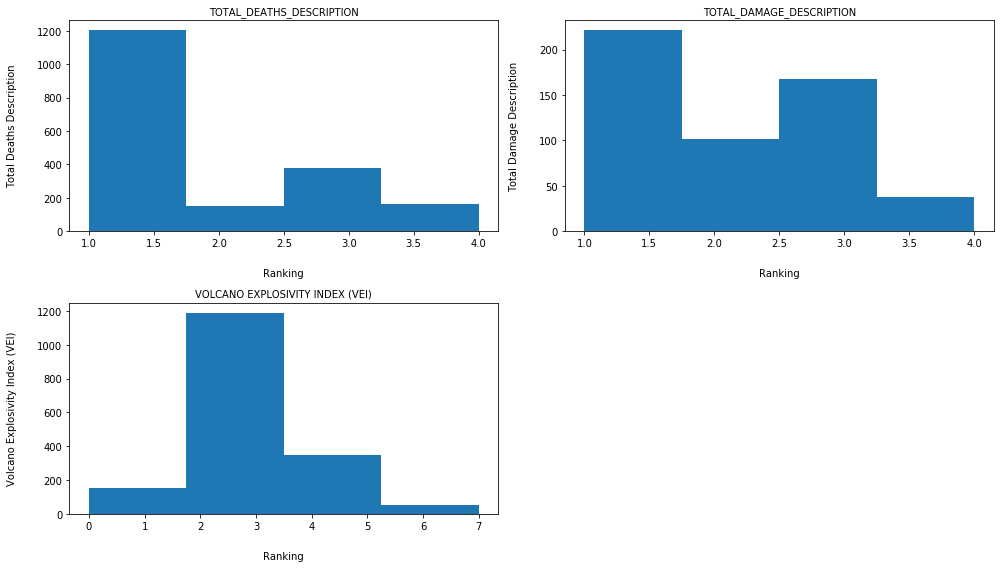

In [8]:
fig = plt.figure(figsize=(14, 8))

z = [data['TOTAL_DEATHS_DESCRIPTION']]
ax1 = plt.subplot(2,2,1)
ax1.hist(z, bins = 4)
plt.title("TOTAL_DEATHS_DESCRIPTION", fontsize=10)
plt.xlabel("Ranking", labelpad=20)
plt.ylabel("Total Deaths Description", labelpad=20)


z = [data['TOTAL_DAMAGE_DESCRIPTION']]
ax2 = plt.subplot(2,2,2)
ax2.hist(z, bins = 4)
plt.title("TOTAL_DAMAGE_DESCRIPTION", fontsize=10)
plt.xlabel("Ranking", labelpad=20)
plt.ylabel("Total Damage Description", labelpad=20)


z = [data['Volcano Explosivity Index (VEI)']]
ax3 = plt.subplot(2,2,3)
ax3.hist(z, bins = 4)
plt.title("VOLCANO EXPLOSIVITY INDEX (VEI)", fontsize=10)
plt.xlabel("Ranking", labelpad=20)
plt.ylabel("Volcano Explosivity Index (VEI)", labelpad=20)

fig.tight_layout()
plt.show()

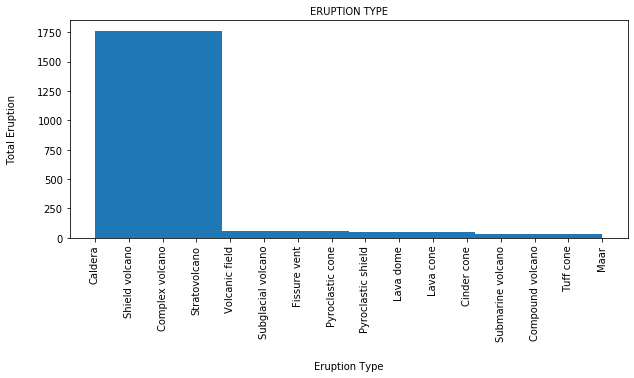

In [9]:
#Histogram plot for Total Eruption Types
z = [data['Type']]
plt.figure(figsize=(10,4))
plt.hist(z, bins = 4)
plt.xticks(rotation=90)
plt.title("ERUPTION TYPE", fontsize=10)
plt.xlabel("Eruption Type", labelpad=20)
plt.ylabel("Total Eruption", labelpad=20)
plt.show()

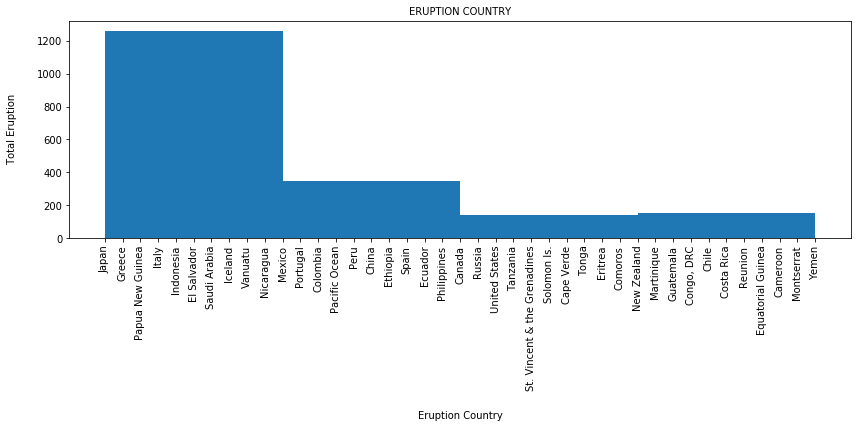

In [10]:
# plot of eruption distribution by Country
z = [data['Country']]
plt.figure(figsize=(14,4))
plt.hist(z, bins = 4)
plt.xticks(rotation=90)
plt.title("ERUPTION COUNTRY", fontsize=10)
plt.xlabel("Eruption Country", labelpad=20)
plt.ylabel(" Total Eruption", labelpad=20)
plt.show()

Text(0, 0.5, 'Volcano Explosivity Index (VEI)')

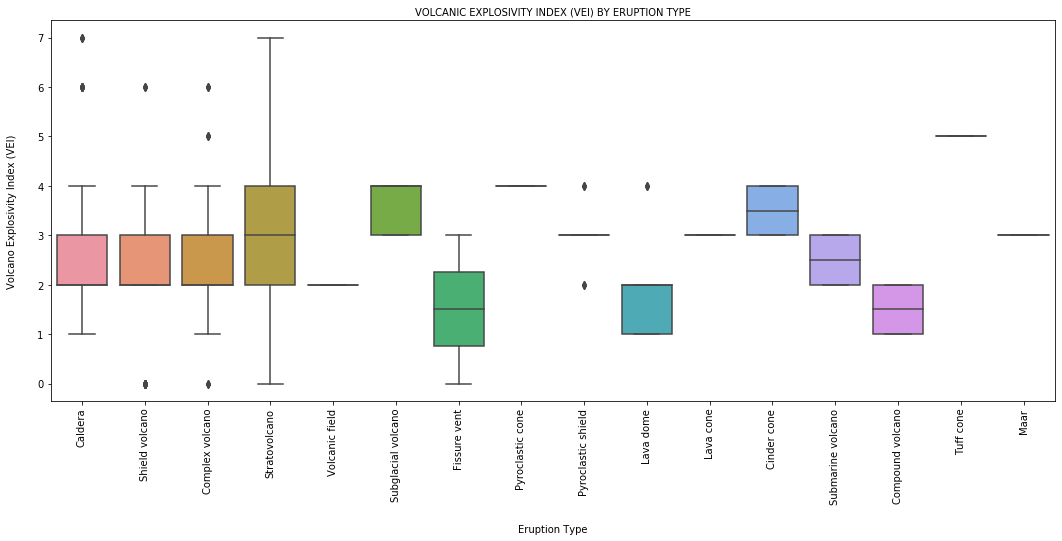

In [11]:
# Box plot of Eruption Type ploted againts Volcanic Explosivity Index (VEI)
plt.figure(figsize=(18,7))
sns.boxplot(data = data, y = 'Volcano Explosivity Index (VEI)', x ='Type' )
plt.xticks(rotation=90)
plt.title("VOLCANIC EXPLOSIVITY INDEX (VEI) BY ERUPTION TYPE", fontsize=10)
plt.xlabel("Eruption Type", labelpad=20)
plt.ylabel("Volcano Explosivity Index (VEI)", labelpad=20)

Text(0, 0.5, 'Total Deaths Descritpion')

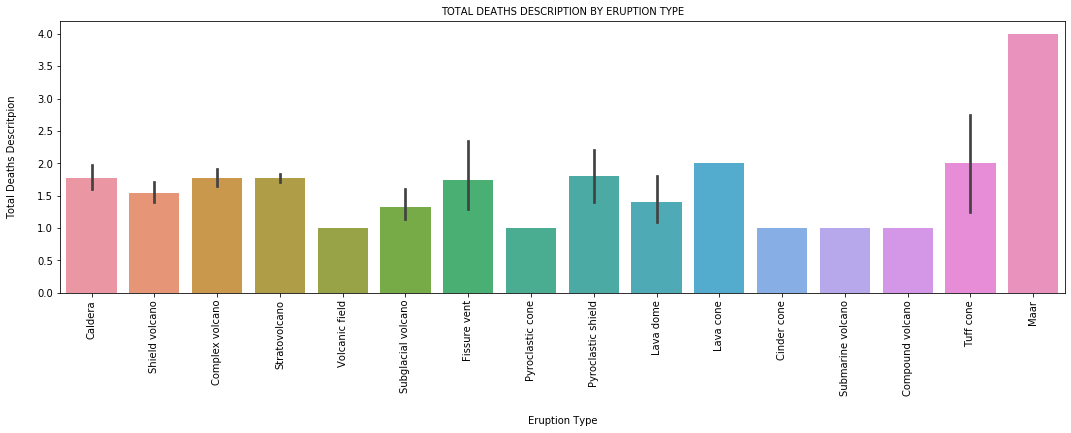

In [12]:
# Bar chart of Eruption Type ploted againts Total Death Description 
plt.figure(figsize=(18,5))
sns.barplot(data = data, y = 'TOTAL_DEATHS_DESCRIPTION', x ='Type' )
plt.xticks(rotation=90)
plt.title("TOTAL DEATHS DESCRIPTION BY ERUPTION TYPE", fontsize=10)
plt.xlabel("Eruption Type", labelpad=20)
plt.ylabel("Total Deaths Descritpion", labelpad=20)

Text(0, 0.5, 'Total Damage Descritpion')

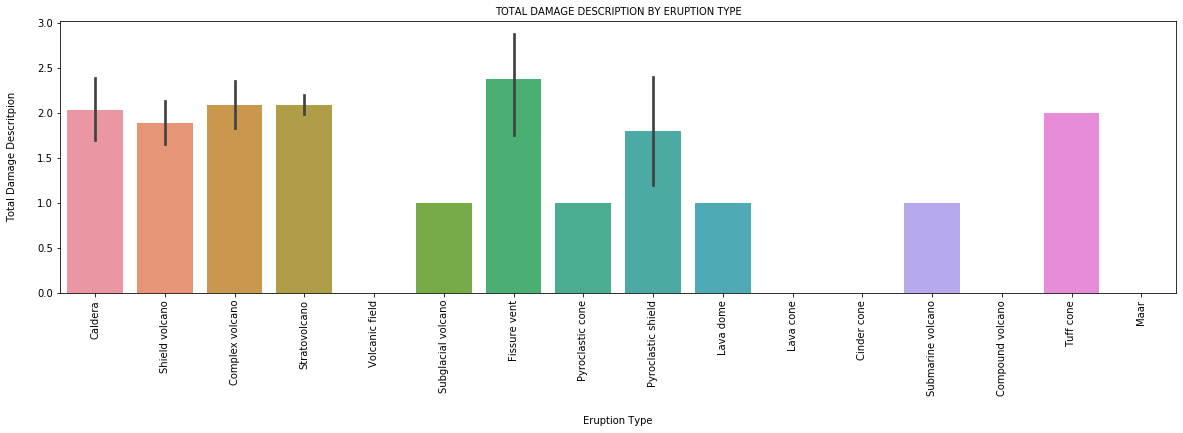

In [13]:
# Bar chart of Eruption Type ploted againts Total Damage Description 
plt.figure(figsize=(20,5))
sns.barplot(data = data, x ='Type', y = 'TOTAL_DAMAGE_DESCRIPTION')
plt.xticks(rotation=90)
plt.title("TOTAL DAMAGE DESCRIPTION BY ERUPTION TYPE", fontsize=10)
plt.xlabel("Eruption Type", labelpad=20)
plt.ylabel("Total Damage Descritpion", labelpad=20)

### Regression Analysis

Regression analysis is a powerful statistical method that allows the user to examine relationship between two or more variables of interest. While there are many types of regression analysis, at their core they all examine the influence of one or more independent variables on a dependent variable.In this analysis, I use Logistic Regression which is a binary classifier to determine the significance of an eruption or otherwise.   

In [14]:
#Select required column for the analysis.
re_data = data[['SN','Volcano Explosivity Index (VEI)','TOTAL_DEATHS_DESCRIPTION', 'TOTAL_DAMAGE_DESCRIPTION', 'Classification ']]

#visualize data
re_data.head()

SN  Volcano Explosivity Index (VEI)  TOTAL_DEATHS_DESCRIPTION  \
1    2                              7.0                       3.0   
12  13                              6.0                       3.0   
19  20                              NaN                       3.0   
20  21                              NaN                       1.0   
26  27                              5.0                       4.0   

    TOTAL_DAMAGE_DESCRIPTION  Classification   
1                        3.0              1.0  
12                       3.0              1.0  
19                       NaN              1.0  
20                       NaN              0.0  
26                       NaN              1.0

Using NOAA classification guide, I have classified 317 eruptions, the classified eruptions were selected to cut across all possible combinations, given considerations to Type, Volcano Explosivity Index (VEI), Total Deaths Description and Total Damage Description columns, also consideration was given to all possible outcomes. Cells with NaN are replaced with zero as the classifier will not take NaN for a value. The manually classified data is then used to train and test model accuracy as we will see in subsequent cells. 

In [15]:
#Select data for model training
train = re_data.loc[re_data['Classification '].notna()]
train =train.fillna(0)
train.head()

SN  Volcano Explosivity Index (VEI)  TOTAL_DEATHS_DESCRIPTION  \
1    2                              7.0                       3.0   
12  13                              6.0                       3.0   
19  20                              0.0                       3.0   
20  21                              0.0                       1.0   
26  27                              5.0                       4.0   

    TOTAL_DAMAGE_DESCRIPTION  Classification   
1                        3.0              1.0  
12                       3.0              1.0  
19                       0.0              1.0  
20                       0.0              0.0  
26                       0.0              1.0

#### Logistic Regression Plot 

Text(0.5, 1.0, 'Manually Classified Eruption Plot')

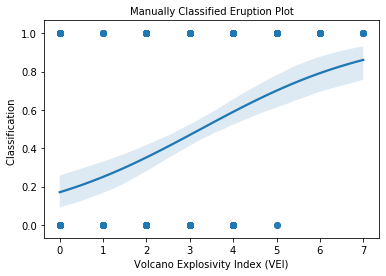

In [16]:
#Define X and Y 
x = train['Volcano Explosivity Index (VEI)']
y = train['Classification ']

#Visaulizing the manual classified eruptions 
sns.regplot(x=x, y=y, data=train, logistic=True)
plt.title("Manually Classified Eruption Plot", fontsize=10)

#### Logistic Regresssion Classification 

The approach is to train and test three regression models, the best model will be used to predict/classifiy the eruption data set which will then be used for further analysis.

In [17]:
#Define X and y Variable
X = train[['Volcano Explosivity Index (VEI)','TOTAL_DEATHS_DESCRIPTION','TOTAL_DAMAGE_DESCRIPTION']]
y = train['Classification '] 

#split data into training and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


#### Fit and test model accuracy 

In [18]:
#fit and test logistic regression  model
log_reg = LogisticRegression()
L_Class = log_reg.fit(X_train, y_train)


#Calculate model performance score 
r_sq = L_Class.score(X_train, y_train)
print('Logistic Regression r_sq = ',r_sq)

#apply model on test data 
y = L_Class.predict(X_test)
print ( "\nLogistic Regression Prediction Accuracy = %.3f" % (metrics.accuracy_score(y, y_test)) )


# confusion matrix for SVM
Matrix = confusion_matrix(y_test,y)
print('\nLogistic Regression Confusion Matrix\n', Matrix)

Logistic Regression r_sq =  0.9565217391304348

Logistic Regression Prediction Accuracy = 0.922

Logistic Regression Confusion Matrix
 [[34  1]
 [ 4 25]]


In [19]:
#fit and test Support Vector Machine 
svc = SVC()
S_Class = svc.fit(X_train, y_train)

#Calculate model performance score 
r_sq = S_Class.score(X_train, y_train)
print('Support Vector Machine r_sq = ',r_sq)

#apply model on test data 
y = S_Class.predict(X_test)
print ( "\nSupport Vector Machine Prediction Accuracy = %.3f" % (metrics.accuracy_score(y, y_test)) )


# confusion matrix for SVM
Matrix = confusion_matrix(y_test,y)
print('\nSupport Vector Machine\n', Matrix)

Support Vector Machine r_sq =  1.0

Support Vector Machine Prediction Accuracy = 0.984

Support Vector Machine
 [[35  0]
 [ 1 28]]


In [20]:
#fit and test Cross Validation Model
log_reg = LogisticRegression()
Grid = GridSearchCV(log_reg,{'penalty':['l2']}, cv = 5)

#Calculate Model Performance score 
LG_scores = cross_val_score(Grid, X_train, y_train, cv=5)
print('Cross Validation Model Score =', LG_scores.mean())  

#apply model on test data 
Class = Grid.fit(X_train, y_train)
y = Class.predict(X_test)
print ( "\nCross Validation Prediction Accuracy = %.3f" % (metrics.accuracy_score(y, y_test)) )


# confusion matrix for CVM
Matrix = confusion_matrix(y_test,y)
print('\nCross Validation Confusion Matrix \n', Matrix)

Cross Validation Model Score = 0.956313725490196

Cross Validation Prediction Accuracy = 0.922

Cross Validation Confusion Matrix 
 [[34  1]
 [ 4 25]]


#### Classify Data

Support Vector Machine Model (S_Class) performed best and will therefore be used for classifying eruptions. 

In [21]:
#select data rows to be classified
test = re_data.loc[re_data['Classification '].isna()]
test = test.drop(['Classification '], axis = 1).fillna(0)
test.head()

SN  Volcano Explosivity Index (VEI)  TOTAL_DEATHS_DESCRIPTION  \
399  400                              3.0                       3.0   
400  401                              1.0                       1.0   
401  402                              4.0                       1.0   
402  403                              3.0                       3.0   
404  405                              3.0                       1.0   

     TOTAL_DAMAGE_DESCRIPTION  
399                       0.0  
400                       0.0  
401                       0.0  
402                       0.0  
404                       0.0

In [22]:
#apply the S_Class model on data and join result to data set table (Classification)
test_data = test[['Volcano Explosivity Index (VEI)','TOTAL_DEATHS_DESCRIPTION','TOTAL_DAMAGE_DESCRIPTION']]
test['Classification'] = S_Class.predict(test_data)#.astype(int)
test.head()

SN  Volcano Explosivity Index (VEI)  TOTAL_DEATHS_DESCRIPTION  \
399  400                              3.0                       3.0   
400  401                              1.0                       1.0   
401  402                              4.0                       1.0   
402  403                              3.0                       3.0   
404  405                              3.0                       1.0   

     TOTAL_DAMAGE_DESCRIPTION  Classification  
399                       0.0             1.0  
400                       0.0             0.0  
401                       0.0             0.0  
402                       0.0             1.0  
404                       0.0             0.0

Now that the classification is done, lets have some visualization of the dataset alongside the classification 

In [23]:
# Merge Train and Classified data sets
Dmap_1 =pd.merge((data[['SN','Location', 'Country', 'Latitude', 'Longitude','Elevation', 'Name', 'Type', 'Year']]),train, how = 'inner', on = ['SN'])
Dmap_2 = pd.merge((data[['SN','Location', 'Country', 'Latitude', 'Longitude','Elevation', 'Name', 'Type','Year']]),test, how = 'inner', on = ['SN'])
Dmap = pd.concat([Dmap_1, Dmap_2])
Dmap = Dmap.groupby(lambda x:x, axis=1).sum()
Dmap = Dmap.drop(['Classification '], axis=1)

Dmap.head()

Classification           Country  Elevation  Latitude  \
0             0.0             Japan        717    30.780   
1             0.0            Greece        329    36.404   
2             0.0  Papua New Guinea        270    -2.380   
3             0.0             Italy       3350    37.734   
4             0.0             Italy       1281    40.821   

               Location  Longitude               Name  SN  \
0             Ryukyu Is    130.280              Kikai   2   
1                Greece     25.396          Santorini  13   
2  Admiralty Is-SW Paci    147.350  St. Andrew Strait  20   
3                 Italy     15.004               Etna  21   
4                 Italy     14.426           Vesuvius  27   

   TOTAL_DAMAGE_DESCRIPTION  TOTAL_DEATHS_DESCRIPTION             Type  \
0                       3.0                       3.0          Caldera   
1                       3.0                       3.0   Shield volcano   
2                       0.0                       3.0  Complex volcano   
3                       0.0                       1.0    Stratovolcano   
4                       0.0                       4.0  Complex volcano   

   Volcano Explosivity Index (VEI)  Year  
0                              7.0 -4350  
1                              6.0 -1610  
2                              0.0  -150  
3                              0.0  -141  
4                              5.0    79

In [24]:
#install folium library for visualization
!pip install folium

In [25]:
#intialize map
world_map = folium.Map(location=[(Dmap['Latitude']).mean(),(Dmap['Longitude']).mean()],zoom_start=2) 

#make map 
for row in Dmap.itertuples():
    world_map.add_child(folium.Marker(location=[row.Latitude,  row.Longitude], 
                 popup = [row.Name, row.Location], 
    icon=folium.Icon(color="red" if row.Classification ==1 
                                        else "green", 
                          prefix="fa", icon="circle" )))
    
    
#create legend 
legend_html =   ''' 
                <div style="position: fixed; 
                            bottom: 00px; left: 00px; width: 160px; height: 100px; 
                            border:4px solid grey; z-index:9999; font-size:16px;
                            ">&nbsp; LEGEND <br>
                              &nbsp; Non-Significant &nbsp; <i class="fa fa-map-marker fa-2x" style="color:green"></i><br>
                              &nbsp; Significant &nbsp; <i class="fa fa-map-marker fa-2x" style="color:red"></i>
                </div>
                ''' 
#call map function
world_map.get_root().html.add_child(folium.Element(legend_html))
world_map

In [26]:
#group eruptions into regions with drill down

from folium.plugins import MarkerCluster
world_map = folium.Map(location=[(Dmap['Latitude']).mean(),(Dmap['Longitude']).mean()],zoom_start=4)
#some_map = folium.Map(location=[subset_of_df[‘INTPTLAT’].mean(),  subset_of_df[‘INTPTLONG’].mean()], zoom_start=4)
mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in Dmap.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitude,  row.Longitude],
                 popup=row.Classification))

world_map.add_child(mc)
world_map

#### Data Analysis 

25.0 % of the total eruptions is Significant


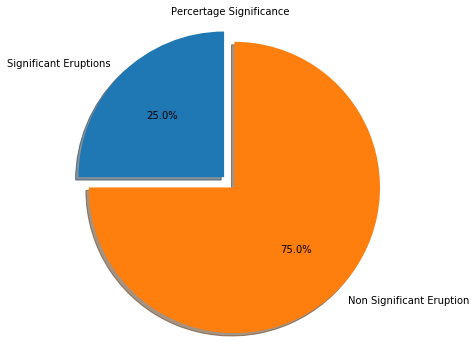

In [27]:
#calculate and plot the percentage of significant eruption 
Percentage_significance = (round((Dmap.Classification.sum())/(Dmap.Classification.count())*100))


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Significant Eruptions', 'Non Significant Eruption'

sizes = [Percentage_significance, (100 - Percentage_significance)]
explode = (0.1, 0)


fig1, ax1 = plt.subplots(figsize=(6, 6))
#plt.figure()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percertage Significance", fontsize=10)

print(Percentage_significance,'% of the total eruptions is Significant')


In [28]:
#Unique Eruption Type
Dmap.Type.unique()

array(['Caldera', 'Shield volcano', 'Complex volcano', 'Stratovolcano',
       'Volcanic field', 'Subglacial volcano', 'Fissure vent',
       'Pyroclastic cone', 'Pyroclastic shield', 'Lava dome', 'Lava cone',
       'Submarine volcano', 'Tuff cone', 'Cinder cone',
       'Compound volcano', 'Maar'], dtype=object)

In [29]:
# group eruption types in Significant and not significant 
#Caldera
Caldera = (Dmap.loc[Dmap['Type'] =='Caldera'])
Yes_Caldera = (Caldera.loc[Caldera['Classification'] ==1])
Yes_Caldera.Classification.count()
No_Caldera = (Caldera.loc[Caldera['Classification'] ==0])
No_Caldera.Classification.count()

#Shield Volcano
Shield_volcano = (Dmap.loc[Dmap['Type'] =='Shield volcano'])
Yes_sheild = (Shield_volcano.loc[Shield_volcano['Classification'] ==1])
Yes_sheild.Classification.count()
No_sheild = (Shield_volcano.loc[Shield_volcano['Classification'] ==0])
No_sheild.Classification.count()

#Complex Volcano
Complex_volcano = (Dmap.loc[Dmap['Type'] =='Complex volcano'])
Yes_Complex_volcano = (Complex_volcano.loc[Complex_volcano['Classification'] ==1])
Yes_Complex_volcano.Classification.count()
No_Complex_volcano = (Complex_volcano.loc[Complex_volcano['Classification'] ==0])
No_Complex_volcano.Classification.count()

#Startovolcano
Stratovolcano = (Dmap.loc[Dmap['Type'] =='Stratovolcano'])
Yes_Stratovolcano = (Stratovolcano.loc[Stratovolcano['Classification'] ==1])
Yes_Stratovolcano.Classification.count()
No_Stratovolcano = (Stratovolcano.loc[Stratovolcano['Classification'] ==0])
No_Stratovolcano.Classification.count()


#Subglacial Valcano
Subglacial_volcano = (Dmap.loc[Dmap['Type'] =='Subglacial volcano'])
Yes_Subglacial_volcano = (Subglacial_volcano.loc[Subglacial_volcano['Classification'] ==1])
Yes_Subglacial_volcano.Classification.count()
No_Subglacial_volcano = (Subglacial_volcano.loc[Subglacial_volcano['Classification'] ==0])
No_Subglacial_volcano.Classification.count()

#Volcanic Field 
Volcanic_field = (Dmap.loc[Dmap['Type'] =='Volcanic field'])
Yes_Volcanic_field = (Volcanic_field.loc[Volcanic_field['Classification'] ==1])
Yes_Volcanic_field.Classification.count()
No_Volcanic_field = (Volcanic_field.loc[Volcanic_field['Classification'] ==0])
No_Volcanic_field.Classification.count()

#Fissure vent 
Fissure_vent = (Dmap.loc[Dmap['Type'] =='Fissure vent'])
Yes_Fissure_vent = (Fissure_vent.loc[Fissure_vent['Classification'] ==1])
Yes_Fissure_vent.Classification.count()
No_Fissure_vent = (Fissure_vent.loc[Fissure_vent['Classification'] ==0])
No_Fissure_vent.Classification.count()

#Pyroclastic cone 
Pyroclastic_cone = (Dmap.loc[Dmap['Type'] =='Pyroclastic cone'])
Yes_Pyroclastic_cone = (Pyroclastic_cone.loc[Pyroclastic_cone['Classification'] ==1])
Yes_Pyroclastic_cone.Classification.count()
No_Pyroclastic_cone = (Pyroclastic_cone.loc[Pyroclastic_cone['Classification'] ==0])
No_Pyroclastic_cone.Classification.count()

#Pyroclastic Shield
Pyroclastic_shield = (Dmap.loc[Dmap['Type'] =='Pyroclastic shield'])
Yes_Pyroclastic_shield = (Pyroclastic_shield.loc[Pyroclastic_shield['Classification'] ==1])
Yes_Pyroclastic_shield.Classification.count()
No_Pyroclastic_shield = (Pyroclastic_shield.loc[Pyroclastic_shield['Classification'] ==0])
No_Pyroclastic_shield.Classification.count()

#Lava dome 
Lava_dome = (Dmap.loc[Dmap['Type'] =='Lava dome'])
Yes_Lava_dome = (Lava_dome.loc[Lava_dome['Classification'] ==1])
Yes_Lava_dome.Classification.count()
No_Lava_dome = (Lava_dome.loc[Lava_dome['Classification'] ==0])
No_Lava_dome.Classification.count()

#Lava cone 
Lava_cone = (Dmap.loc[Dmap['Type'] =='Lava cone'])
Yes_Lava_cone = (Lava_cone.loc[Lava_cone['Classification'] ==1])
Yes_Lava_cone.Classification.count()
No_Lava_cone = (Lava_cone.loc[Lava_cone['Classification'] ==0])
No_Lava_cone.Classification.count()

#Submarine volcano 
Submarine_volcano = (Dmap.loc[Dmap['Type'] =='Submarine volcano'])
Yes_Submarine_volcano = (Submarine_volcano.loc[Submarine_volcano['Classification'] ==1])
Yes_Submarine_volcano.Classification.count()
No_Submarine_volcano = (Submarine_volcano.loc[Submarine_volcano['Classification'] ==0])
No_Submarine_volcano.Classification.count()

#Tuff Cone 
Tuff_cone = (Dmap.loc[Dmap['Type'] =='Tuff cone'])
Yes_Tuff_cone = (Tuff_cone.loc[Tuff_cone['Classification'] ==1])
Yes_Tuff_cone.Classification.count()
No_Tuff_cone = (Tuff_cone.loc[Tuff_cone['Classification'] ==0])
No_Tuff_cone.Classification.count()

#Cinder cone 
Cinder_cone = (Dmap.loc[Dmap['Type'] =='Cinder cone'])
Yes_Cinder_cone = (Cinder_cone.loc[Cinder_cone['Classification'] ==1])
Yes_Cinder_cone.Classification.count()
No_Cinder_cone = (Cinder_cone.loc[Cinder_cone['Classification'] ==0])
No_Cinder_cone.Classification.count()

#Compound Volcano 
Compound_volcano = (Dmap.loc[Dmap['Type'] =='Compound volcano'])
Yes_Compound_volcano = (Compound_volcano.loc[Compound_volcano['Classification'] ==1])
Yes_Compound_volcano.Classification.count()
No_Compound_volcano = (Compound_volcano.loc[Compound_volcano['Classification'] ==0])
No_Compound_volcano.Classification.count()

#Maar
Maar = (Dmap.loc[Dmap['Type'] =='Maar'])
Yes_Maar = (Maar.loc[Maar['Classification'] ==1])
Yes_Maar.Classification.count()
No_Maar = (Maar.loc[Maar['Classification'] ==0])
No_Maar.Classification.count()

0

In [30]:
Eruption_Type = pd.DataFrame({'Types': ['Caldera', 'Shield volcano', 'Complex volcano', 'Stratovolcano', 'Subglacial volcano',
       'Volcanic field', 'Fissure vent', 'Pyroclastic cone', 'Pyroclastic shield', 'Lava dome', 'Lava cone',
       'Submarine volcano', 'Tuff cone', 'Cinder cone','Compound volcano', 'Maar'], 'Total Significant':
        [Yes_Caldera.Classification.count(),Yes_sheild.Classification.count(), Yes_Complex_volcano.Classification.count(), 
        Yes_Stratovolcano.Classification.count(),Yes_Subglacial_volcano.Classification.count(), 
        Yes_Volcanic_field.Classification.count(),Yes_Fissure_vent.Classification.count(),
        Yes_Pyroclastic_cone.Classification.count(),Yes_Pyroclastic_shield.Classification.count(),
        Yes_Lava_dome.Classification.count(), Yes_Lava_cone.Classification.count(),
        Yes_Submarine_volcano.Classification.count(), Yes_Tuff_cone.Classification.count(), 
        Yes_Cinder_cone.Classification.count(), Yes_Compound_volcano.Classification.count(),
        Yes_Maar.Classification.count()], 'Total Non_Significant':[No_Caldera.Classification.count(), 
        No_sheild.Classification.count(), No_Complex_volcano.Classification.count(), No_Stratovolcano.Classification.count(), 
        No_Subglacial_volcano.Classification.count(), No_Volcanic_field.Classification.count(), 
        No_Fissure_vent.Classification.count(),No_Pyroclastic_cone.Classification.count(),No_Pyroclastic_shield.Classification.count(), 
        No_Lava_dome.Classification.count(), No_Lava_cone.Classification.count(), No_Submarine_volcano.Classification.count(), 
        No_Tuff_cone.Classification.count(), No_Cinder_cone.Classification.count(), No_Compound_volcano.Classification.count(), 
        No_Maar.Classification.count()]})

Eruption_Type['Total_Eruption_Type'] = (Eruption_Type['Total Significant'] + Eruption_Type['Total Non_Significant'])
Eruption_Type

Types  Total Significant  Total Non_Significant  \
0              Caldera                 31                    106   
1       Shield volcano                 25                    113   
2      Complex volcano                 66                    192   
3        Stratovolcano                330                    900   
4   Subglacial volcano                  0                     15   
5       Volcanic field                  0                      5   
6         Fissure vent                  4                     16   
7     Pyroclastic cone                  0                     14   
8   Pyroclastic shield                  9                     11   
9            Lava dome                  3                     17   
10           Lava cone                  0                      4   
11   Submarine volcano                  0                      8   
12           Tuff cone                  3                      9   
13         Cinder cone                  0                      8   
14    Compound volcano                  0                      8   
15                Maar                  4                      0   

    Total_Eruption_Type  
0                   137  
1                   138  
2                   258  
3                  1230  
4                    15  
5                     5  
6                    20  
7                    14  
8                    20  
9                    20  
10                    4  
11                    8  
12                   12  
13                    8  
14                    8  
15                    4

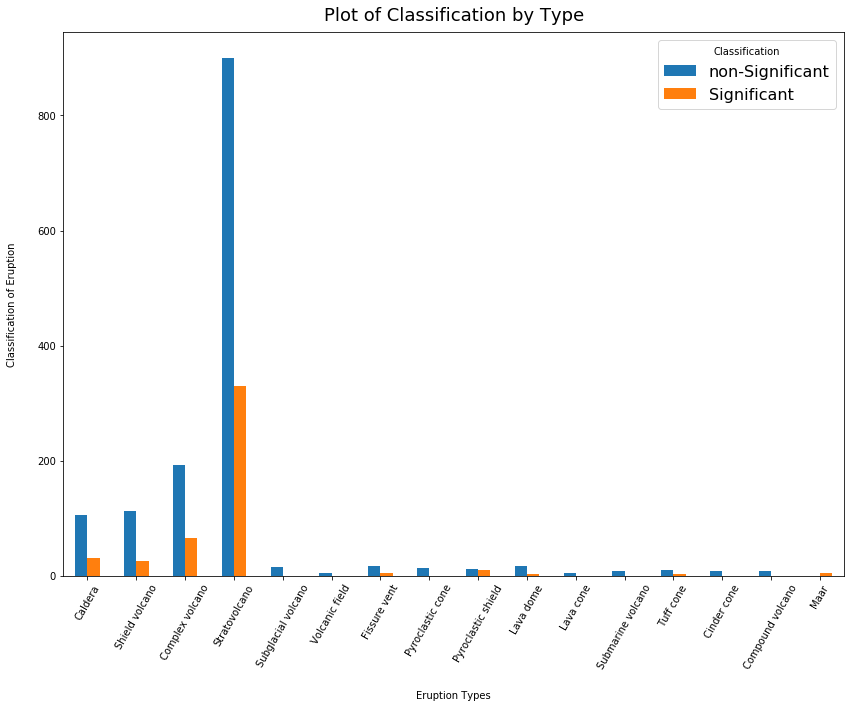

In [31]:
#plot of Significant verse non-Significant for each eruption types
Eruption_Type.set_index('Types')[['Total Non_Significant', 'Total Significant']].plot(kind='bar', figsize=(14, 10))
plt.xticks(rotation=60)
plt.title("Plot of Classification by Type", fontsize=18, y=1.01)
plt.xlabel("Eruption Types", labelpad=20)
plt.ylabel("Classification of Eruption", labelpad=20)
plt.legend(["non-Significant", "Significant"], fontsize=16, title="Classification");

#### Summary 

From the analysis the following can be deduced that;
    1.That 75% of the Naturally occuring eruptions are not significant 
    2.Stratovolcanoes are the most prominent type of Eruption
    3.Highest number of eruptions occurs in the southeastern region of the world 
    4.Subglacial Volcano, Volcanic Vent, Pycroclastic Cone, Submarine Volcano, Lava Cone, Cinder Cone and Compound Volcanoes occurrences are not significant 
    5.Maar has limited occurence,  which are all significant 
    

#### Importance of this study 

Preparation is humanity's best chance againts eruptions, Scientists study earthquakes because they want to know more about their causes and predict where they are likely to happen. They also need to know how the ground moves during earthquakes. This information helps scientists and engineers build safer buildings – especially important buildings in an emergency, like hospitals and government buildings.